<a href="https://colab.research.google.com/github/ungvietanh20172394/KTMT20202_20172394/blob/main/KTMT_20202_UngVietAnh20172394.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Khởi tạo


In [3]:
class Helper:
  def Init1(row, col, num):
    text = ""
    text += 'addi x22, x0, 0 #i'
    text += '\naddi x25, x0, 0x200 #contain base address of input array'
    text += '\naddi x26, x0, 0x400 #contain base address of output array'
    text += '\naddi x24, x0, ' + str(row * col) +' #length of array'
    text += '\naddi x2, x0, ' + str(row) +' #row'
    text += '\naddi x3, x0, ' + str(col) +' #column'
    text += '\naddi x23, x0, ' + str(num) +' #number' + '\n'
    return text

  def Init2(row1, col1row2, col2):
    text = ""
    text += 'addi x24, x0, 0x200 #contain base address of input array1' + '\n'
    text += 'addi x25, x0, 0x400 #contain base address of input array2' + '\n'
    text += 'addi x26, x0, 0x600 #contain base address of output array' + '\n'
    text += 'addi x2, x0, ' + str(row1) +' #row1 = rowAnswer' + '\n'
    text += 'addi x3, x0, ' + str(col1row2) +' # (col1 = row2)' + '\n'
    text += 'addi x4, x0, ' + str(col2) +' #col2 = colAnswer' + '\n'
    text += 'addi x8, x0, 0 #i = 0' + '\n'
    text += 'addi x9, x0, 0 #j = 0' + '\n'
    text += 'addi x10, x0, 0 #k = 0' + '\n'
    text += 'addi x12 , x0, 0 #sum' + '\n'
    return text

  def Init3(arrInput):
    text = ""
    index = 0
    for i in range(len(arrInput)):
      for j in range(len(arrInput[i])):
        text += 'addi x1, x0,' + str(arrInput[i][j]) + '\nsb x1, '+str(index)+'(x25)\n'
        index += 1
    return text

  def Init4(row, col):
    text = ""
    text +="addi x24, x0, 0x750 #contain base address of arr to sort" + '\n'
    text +="addi x25, x0, 0x400 #contain base address of input array" + '\n'
    text +="addi x26, x0, 0x600 #contain base address of output array" + '\n'
    text +="addi x2, x0, 7 #length of array sort -2 = size window - 2" + '\n'
    text +="addi x3, x0, " + str(row*col) + " #length of input array" + '\n'
    text +="addi x4, x0, 0 #index" + '\n'
    text +="addi x5, x0, " + str(row) + " #row of input" + '\n'
    text +="addi x6, x0, " + str(col) + " #col of input" + '\n'
    text +="addi x10, x0, 0 #k = 0" + '\n'
    text +="addi x11 , x0, 0 #tmp" + '\n'
    return text

 
print(Helper.Init4(5, 5))









  

addi x24, x0, 0x750 #contain base address of arr to sort
addi x25, x0, 0x400 #contain base address of input array
addi x26, x0, 0x600 #contain base address of output array
addi x2, x0, 7 #length of array sort -2 = size window - 2
addi x3, x0, 25 #length of input array
addi x4, x0, 0 #index
addi x5, x0, 5 #row of input
addi x6, x0, 5 #col of input
addi x10, x0, 0 #k = 0
addi x11 , x0, 0 #tmp



In [65]:
import numpy as np

class Calculator:
  def MatrixScaler(MaIp, number):
    MaOp = MaIp * number;
    length = MaIp.shape[0] * MaIp.shape[1]
    obj = open("ScaleMatrix.txt", mode='w+')
    text = Helper.Init1(MaIp.shape[0],MaIp.shape[1],number)
    index = 0
    for x in np.nditer(MaIp):
      text += 'addi x1, x0,' + str(x) + '\nsb x1, '+str(index)+'(x25)\n'
      index +=1

    text += 'loop:' + '\n'
    text += 'bgt x22, x24 , exit' + '\n'
    text += 'add x10, x22, x25' + '\n'
    text += 'add x11, x22, x26' + '\n'
    text += 'lb x9, 0(x10)' + '\n'
    text += 'mul x1, x9, x23' + '\n'
    text += 'sb x1, 0(x11)' + '\n'
    text += 'addi x22, x22,1' + '\n'
    text += 'beq x0, x0, loop' + '\n'
    text += 'exit:' + '\n'
    text += 'nop' + '\n'
    
    obj.write(text)
    obj.close()
    print("Check file ScaleMatrix.txt")
    return MaOp

  def MatrixMultiply(MaIp1, MaIp2):
    MaOp = np.dot(MaIp1, MaIp2);
    obj = open("MultiMatrix.txt", mode='w+')
    index = 0
    if(MaIp1.shape[1] != MaIp2.shape[0]):
      print("Kiểm tra lại ma trận đầu vào, số cột matrix1 = số hàng matrix2")
      return
    text = Helper.Init2(MaIp1.shape[0],MaIp1.shape[1],MaIp2.shape[1])
    for x in np.nditer(MaIp1):
      text += 'addi x1, x0,' + str(x) + '\nsb x1, '+str(index)+'(x24)\n'
      index +=1

    index = 0
    for x in np.nditer(MaIp2):
      text += 'addi x1, x0,' + str(x) + '\nsb x1, '+str(index)+'(x25)\n'
      index +=1

    text += 'loop:' + '\n'
    text += 'bgt x8, x2 , exit # i >= row1 rowAns => exit' + '\n'
    text += 'addi x9, x0, 0'+ '\n'
    text += 'loop2:'+ '\n'
    text += 'bgt x9, x4 , exit2 # j >= col2 colAns => exit2'+ '\n'

    text += 'addi x12 , x0, 0 #sum'+ '\n'
    text += 'addi x10, x0, 0'+ '\n'
    text += 'loop3:'+ '\n'
    text += 'bge x10, x3 , exit3 # k >= col1 => exit3'+ '\n'

    text += 'mul x15, x8, x3  #i * col1 '+ '\n'
    text += 'add x15, x15, x10 #i * col1 + k'+ '\n'
    text += 'add x15, x15, x24 # &a[i * col1 + k] -- a is matrix 1'+ '\n'
    text += 'lb x16, 0(x15) # a[i * col1 + k]'+ '\n'

    text += 'mul x15, x10, x4  #k * col2'+ '\n'     
    text += 'add x15, x15, x9 #k * col2 + j'+ '\n'
    text += 'add x15, x15, x25 # &a[i * col1 + k] -- b is matrix 2'+ '\n'
    text += 'lb x17, 0(x15) # b[k * col2 + j]'+ '\n'

    text += 'mul x18, x16, x17 #a[i * col1 + k] * b[k * col2 + j]'+ '\n'
    text += 'add x12 , x12, x18 #sum = sum + a[i * col1 + k] * b[k * col2 + j]'+ '\n'

    text += 'addi x10, x10, 1 # k++'+ '\n'
    text += 'beq x0, x0, loop3 '+ '\n'
    text += 'exit3:'+ '\n'

    text += 'mul x19, x4, x8 #i * col2'+ '\n'
    text += 'add x19,x19, x9 #i * col2 + j'+ '\n'
    text += 'add x19,x19, x26 #&d[i * col2 + j]'+ '\n'
    text += 'sb x12, 0(x19) #d[i * col2 + j] = sum -- d is output matrix'+ '\n'


    text += 'addi x9, x9, 1 # j++'+ '\n'
    text += 'beq x0, x0, loop2 '+ '\n'
    text += 'exit2:'+ '\n'

    text += 'addi x8, x8, 1 # i++'+ '\n'
    text += 'beq x0, x0, loop'+ '\n'
    text += 'exit:'+ '\n'
    text += 'nop'+ '\n'
      
    obj.write(text)
    obj.close()
    print("Check file MultiMatrix.txt")
    return MaOp

  def MediunFilter(image):
    rows = len(image)
    columns = len(image[0])
    text = Helper.Init4(row=rows, col = columns)
    text += Helper.Init3(image)
    obj = open("MedianFilter.txt", mode='w+')
    text+='# output = input'+ '\n'
    text+='copyInput:'+ '\n'
    text+='bgt x4, x3, exitcopyInput # index >= lenghth input arr => exitcopyInput'+ '\n'
    text+='add x15, x4, x25'+ '\n'
    text+='lb x16, 0(x15)'+ '\n'
    text+='add x15, x4, x26'+ '\n'
    text+='sb x16, 0(x15)'+ '\n'
    text+='addi x4, x4, 1 # index++'+ '\n'
    text+='beq x0, x0, copyInput'+ '\n'
    text+='exitcopyInput:'+ '\n'
    text+='addi x12, x0, 1 #row'+ '\n'
    text+='addi x13, x0, 1 #col'+ '\n'
    text+='addi x21, x5, -1'+ '\n'
    text+='addi x22, x6, -1'+ '\n'
    text+='row:'+ '\n'
    text+='bge x12, x21 , exitRow # row >= row input => exit'+ '\n'
    text+='addi x13, x0, 1'+ '\n'
    text+='col:'+ '\n'
    text+='bge x13, x22 , exitCol # row >= row input => exit'+ '\n'
    text+='#window[0] = array[row-1][col-1]'+ '\n'
    text+='addi x19, x12, -1 #[row-1]'+ '\n'
    text+='addi x20, x13, -1 #[col-1]'+ '\n'
    text+='mul x19, x5, x19'+ '\n'
    text+='add x19, x19, x20'+ '\n'
    text+='add x19, x19, x25 #&array[row-1][col-1]'+ '\n'
    text+='lb x20, 0(x19) #array[row-1][col-1]'+ '\n'
    text+='sb x20, 0(x24)'+ '\n'
    text+='#window[1] = array[row-1][col]'+ '\n'
    text+='addi x19, x12, -1 #[row-1]'+ '\n'
    text+='addi x20, x13, 0 #[col]'+ '\n'
    text+='mul x19, x5, x19'+ '\n'
    text+='add x19, x19, x20'+ '\n'
    text+='add x19, x19, x25 #&array[row-1][col]'+ '\n'
    text+='lb x20, 0(x19) #array[row-1][col]'+ '\n'
    text+='sb x20, 1(x24)'+ '\n'
    text+='#window[2] = array[row-1][col+1]'+ '\n'
    text+='addi x19, x12, -1 #[row-1]'+ '\n'
    text+='addi x20, x13, 1 #[col+1]'+ '\n'
    text+='mul x19, x5, x19'+ '\n'
    text+='add x19, x19, x20'+ '\n'
    text+='add x19, x19, x25 #&array[row-1][col+1]'+ '\n'
    text+='lb x20, 0(x19) #array[row-1][col+1]'+ '\n'
    text+='sb x20, 2(x24)'+ '\n'
    text+='#window[3] = array[row][col-1]'+ '\n'
    text+='addi x19, x12, 0 #[row]'+ '\n'
    text+='addi x20, x13, -1 #[col-1]'+ '\n'
    text+='mul x19, x5, x19'+ '\n'
    text+='add x19, x19, x20'+ '\n'
    text+='add x19, x19, x25 #&array[row][col-1]'+ '\n'
    text+='lb x20, 0(x19) #array[row][col-1]'+ '\n'
    text+='sb x20, 3(x24)'+ '\n'
    text+='#window[4] = array[row][col]'+ '\n'
    text+='addi x19, x12, 0 #[row]'+ '\n'
    text+='addi x20, x13, 0 #[col]'+ '\n'
    text+='mul x19, x5, x19'+ '\n'
    text+='add x19, x19, x20'+ '\n'
    text+='add x19, x19, x25 #&array[row][col]'+ '\n'
    text+='lb x20, 0(x19) #array[row][col]'+ '\n'
    text+='sb x20, 4(x24)'+ '\n'
    text+='#window[5] = array[row][col+1]'+ '\n'
    text+='addi x19, x12, 0 #[row]'+ '\n'
    text+='addi x20, x13, 1 #[col+1]'+ '\n'
    text+='mul x19, x5, x19'+ '\n'
    text+='add x19, x19, x20'+ '\n'
    text+='add x19, x19, x25 #&array[row][col+1]'+ '\n'
    text+='lb x20, 0(x19) #array[row][col+1]'+ '\n'
    text+='sb x20, 5(x24)'+ '\n'
    text+='#window[6] = array[row+1][col-1]'+ '\n'
    text+='addi x19, x12, 1 #[row+1]'+ '\n'
    text+='addi x20, x13, -1 #[col-1]'+ '\n'
    text+='mul x19, x5, x19'+ '\n'
    text+='add x19, x19, x20'+ '\n'
    text+='add x19, x19, x25 #&array[row+1][col-1]'+ '\n'
    text+='lb x20, 0(x19) #array[row+1][col-1]'+ '\n'
    text+='sb x20, 6(x24)'+ '\n'
    text+='#window[7] = array[row+1][col]'+ '\n'
    text+='addi x19, x12, 1 #[row+1]'+ '\n'
    text+='addi x20, x13, 0 #[col]'+ '\n'
    text+='mul x19, x5, x19'+ '\n'
    text+='add x19, x19, x20'+ '\n'
    text+='add x19, x19, x25 #&array[row+1][col]'+ '\n'
    text+='lb x20, 0(x19) #array[row+1][col]'+ '\n'
    text+='sb x20, 7(x24)'+ '\n'
    text+='#window[8] = array[row+1][col+1]'+ '\n'
    text+='addi x19, x12, 1 #[row+1]'+ '\n'
    text+='addi x20, x13, 1 #[col+1]'+ '\n'
    text+='mul x19, x5, x19'+ '\n'
    text+='add x19, x19, x20'+ '\n'
    text+='add x19, x19, x25 #&array[row+1][col+1]'+ '\n'
    text+='lb x20, 0(x19) #array[row+1][col+1]'+ '\n'
    text+='sb x20, 8(x24)'+ '\n'
    text+='#sort window ---------------selction sort'+ '\n'
    text+='addi x8, x0, 0 #i = 0'+ '\n'
    
    text+='addi x9, x0, 0 #j = 0'+ '\n'
    text+='loop:'+ '\n'

    text+='bgt x8, x2 , exitSort # i > lenghth arr => exit'+ '\n'
    text+='addi x9, x0, 0'+ '\n'
    text+='loop2:'+ '\n'
    text+='bgt x9, x2 , exit2 # j > lenghth arr => exit2'+ '\n'
    text+='addi x11 , x0, 0 #tmp'+ '\n'


    text+='addi x15, x9, 0 '+ '\n'
    text+='add x15 , x15, x24 #&arr[j]'+ '\n'

    text+='lb x16, 0(x15) # arr[j]'+ '\n'



    text+='addi x14 ,x9, 1'+ '\n'
    text+='add x14 ,x14 ,x24 #&arr[j+1]'+ '\n'

    text+='lb x17, 0(x14) # arr[j+1]'+ '\n'

    text+='bltu x16, x17, exit3'+ '\n'
    text+='#addi x11, x16, 0 # tmp = arr[j]'+ '\n'
    text+='sb x17, 0(x15) #arr[j] = arr[j + 1]'+ '\n'
    text+='sb x16,0(x14) #arr[j + 1] = tmp;'+ '\n'

    text+='exit3:'+ '\n'
    text+='addi x9, x9, 1 # j++'+ '\n'
    text+='beq x0, x0, loop2 '+ '\n'
    text+='exit2:'+ '\n'
    text+='addi x8, x8, 1 # i++'+ '\n'
    text+='beq x0, x0, loop'+ '\n'

    text+='exitSort:'+ '\n'

    text+='addi x1, x0, 0'+ '\n'
    text+='lb x1, 4(x24) # get 4 th in sorted array'+ '\n'
    text+='addi x19, x0, 0'+ '\n'

    text+='mul x19, x5, x12'+ '\n'
    text+='add x19, x19, x13'+ '\n'
    text+='add x19, x19, x26 '+ '\n'
    text+='sb x1, 0(x19) #update'+ '\n'



    text+='addi x13, x13, 1 # col++'+ '\n'
    text+='beq x0, x0, col'+ '\n'
    text+='exitCol:'+ '\n'
        
    text+='addi x12, x12, 1 # row++'+ '\n'
    text+='beq x0, x0, row'+ '\n'
    text+='exitRow:'+ '\n'   

    text+='exit:'+ '\n'   
    text+='nop'+ '\n'   
    obj.write(text)
    obj.close()
    filtered= list(map(list, image))
    numrows = rows
    numcols = columns
    array = image.copy()
    # arr = [[0, 0, 0, 0, 0,0], 
    # [0, 0, 0, 0, 0,0], 
    # [0, 0, 0, 0, 0,0], 
    # [0, 0, 0, 0, 0,0], 
    # [0, 0, 0, 0, 0,0], 
    # [0, 0, 0, 0, 0,0]
    # ] 
    arr = list(map(list, image))
    # arr =  [[0]*columns]*rows
    # print(arr)
    
    window = []
    for row in range(1,numrows-1):    
        for col in range(1,numcols-1):
            #neighbor pixel values are stored in window including this pixel
            #print(row, col)
            window = [0,0,0,0,0,0,0,0,0]
            window[0] = array[row-1][col-1]
            window[1] = array[row-1][col]
            window[2] = array[row-1][col+1]
            window[3] = array[row][col-1]
            window[4] = array[row][col]
            window[5] = array[row][col+1]
            window[6] = array[row+1][col-1]
            window[7] = array[row+1][col]
            window[8] = array[row+1][col+1]
            #sort window array
            window.sort(); 
            #put the median to the new array
            arr[row][col]=window[4]; 
            window.clear() 
    filtered = arr
    # print(filtered)
    print("Check file MedianFilter.txt")
    return filtered

#Các phép toán ma trận

###Nhân ma trận với một vô hướng

<figure>
<center>
<img src='https://miro.medium.com/max/1948/1*gf3HdrkDBi6Dch_XxVuYvA.png' />
<figcaption>Nhân vô hướng</figcaption></center>
</figure>

In [ ]:
matrixA = np.array([(1, 2, 3), (4, 5, 6)])
print("input\n" , matrixA)
# [[1 2 3]
#  [4 5 6]]

# Multiplying matrixA by 5
res = Calculator.MatrixScaler(matrixA,5)
print(res)

input
 [[1 2 3]
 [4 5 6]]
Check file ScaleMatrix.txt
[[ 5 10 15]
 [20 25 30]]


###Nhân 2 ma trận


<figure>
<center>
<img src='https://www.geeksforgeeks.org/wp-content/uploads/strassen_new.png' />
<figcaption>Multiplying matrices </figcaption></center>
</figure>

In [ ]:
# create matrix A
A = np.array([(1, 2, 3), (4, 5, 6)])
print("Matrix A")
print(A)

# [[1 2 3]
#  [4 5 6]]

# create matrix B
B = np.array([(0, 5), (4, 9), (9, 0)])
print("Matrix B")
print(B)
# [[0 5]
#  [4 9]
#  [9 0]]

# product of A and B

C = Calculator.MatrixMultiply(A, B)
print("Product of A and B")
print(C)
# [[35 23]
#  [74 65]]

Matrix A
[[1 2 3]
 [4 5 6]]
Matrix B
[[0 5]
 [4 9]
 [9 0]]
Check file MultiMatrix.txt
Product of A and B
[[35 23]
 [74 65]]


#Bộ lọc trung vị


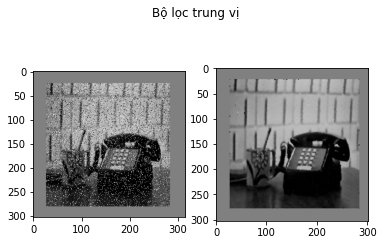

In [82]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1,2)
fig.suptitle('Bộ lọc trung vị')
a = plt.imread("https://media.geeksforgeeks.org/wp-content/uploads/20190520115432/Screenshot-1110.png")
b = plt.imread("https://media.geeksforgeeks.org/wp-content/uploads/20190520115504/Screenshot-1210.png")
axs[0].imshow(a)
axs[1].imshow(b)
fig.show()
print()

<figure>
<center>
<img src='https://www.researchgate.net/profile/Andrzej-Bargiela/publication/276304662/figure/fig1/AS:585524309946368@1516611282138/Example-of-Median-Filtering-using-a-33-sampling-window-keeping-border-values-unchanged.png' />
<figcaption>Median filter </figcaption></center>
</figure>


In [66]:
exmaple = [[1, 4, 0, 1, 3, 1], 
[2, 2, 4, 2, 2, 3],  
[1, 0, 1, 0, 1, 0],  
[1, 2, 1, 0, 2, 2],  
[2, 5, 3, 1, 2, 5],  
[1, 1, 4, 2, 3, 0],  
]
res = Calculator.MediunFilter(exmaple)
for row in res:
  print(row)


Check file MedianFilter.txt
[1, 4, 0, 1, 3, 1]
[2, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 2, 0]
[1, 1, 1, 1, 1, 2]
[2, 2, 2, 2, 2, 5]
[1, 1, 4, 2, 3, 0]


In [67]:
image2 = [[1, 2, 3, 4, 5], 
[6, 7, 8, 9, 10], 
[11, 12, 13, 14, 15], 
[16, 17, 18, 19, 20], 
[21, 22, 23, 24, 25], 
]
res1 = Calculator.MediunFilter(image2)
for row in res1:
  print(row)

Check file MedianFilter.txt
[1, 2, 3, 4, 5]
[6, 7, 8, 9, 10]
[11, 12, 13, 14, 15]
[16, 17, 18, 19, 20]
[21, 22, 23, 24, 25]
